In [16]:
import pandas as pd
pd.set_option("display.max_rows", None, "display.max_columns", None)#to display complete dataframe
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [32]:
#Read the 'indice de cartera vencida' file, and set the col 0 ('Fecha') be the dataframe index.
indice_df = pd.read_excel('icv_mensual.xlsx', index_col=0)

In [20]:
indice_df.head()

,ICV_cartera_total
Fecha,
2002-01-01,0.106834
2002-02-01,0.106372
2002-03-01,0.105889
2002-04-01,0.104348
2002-05-01,0.104370


### EXPLORATORY DATA ANALYSIS WITH PANDAS AND NUMPY

In [37]:
#read the 'variables' dataset
data = pd.read_excel('variables_macro_trimestral.xlsx', index_col=0)
variables_df = data.copy()

In [38]:
#add an incremental column number to see how the variables change with transcurred time
variables_df['count'] = range(0, len(variables_df.index))

In [39]:
#Let's check the column datatypes 
variables_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 80 entries, 2001-03-01 to 2020-12-01
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Desempleo      80 non-null     float64
 1   IPC            72 non-null     float64
 2   TRM            80 non-null     float64
 3   Exportaciones  47 non-null     float64
 4   Importaciones  48 non-null     float64
 5   PIB            63 non-null     float64
 6   count          80 non-null     int32  
dtypes: float64(6), int32(1)
memory usage: 4.7 KB


In [40]:
#Check for null values, and how many per column
variables_df.isnull().sum()

Desempleo         0
IPC               8
TRM               0
Exportaciones    33
Importaciones    32
PIB              17
count             0
dtype: int64

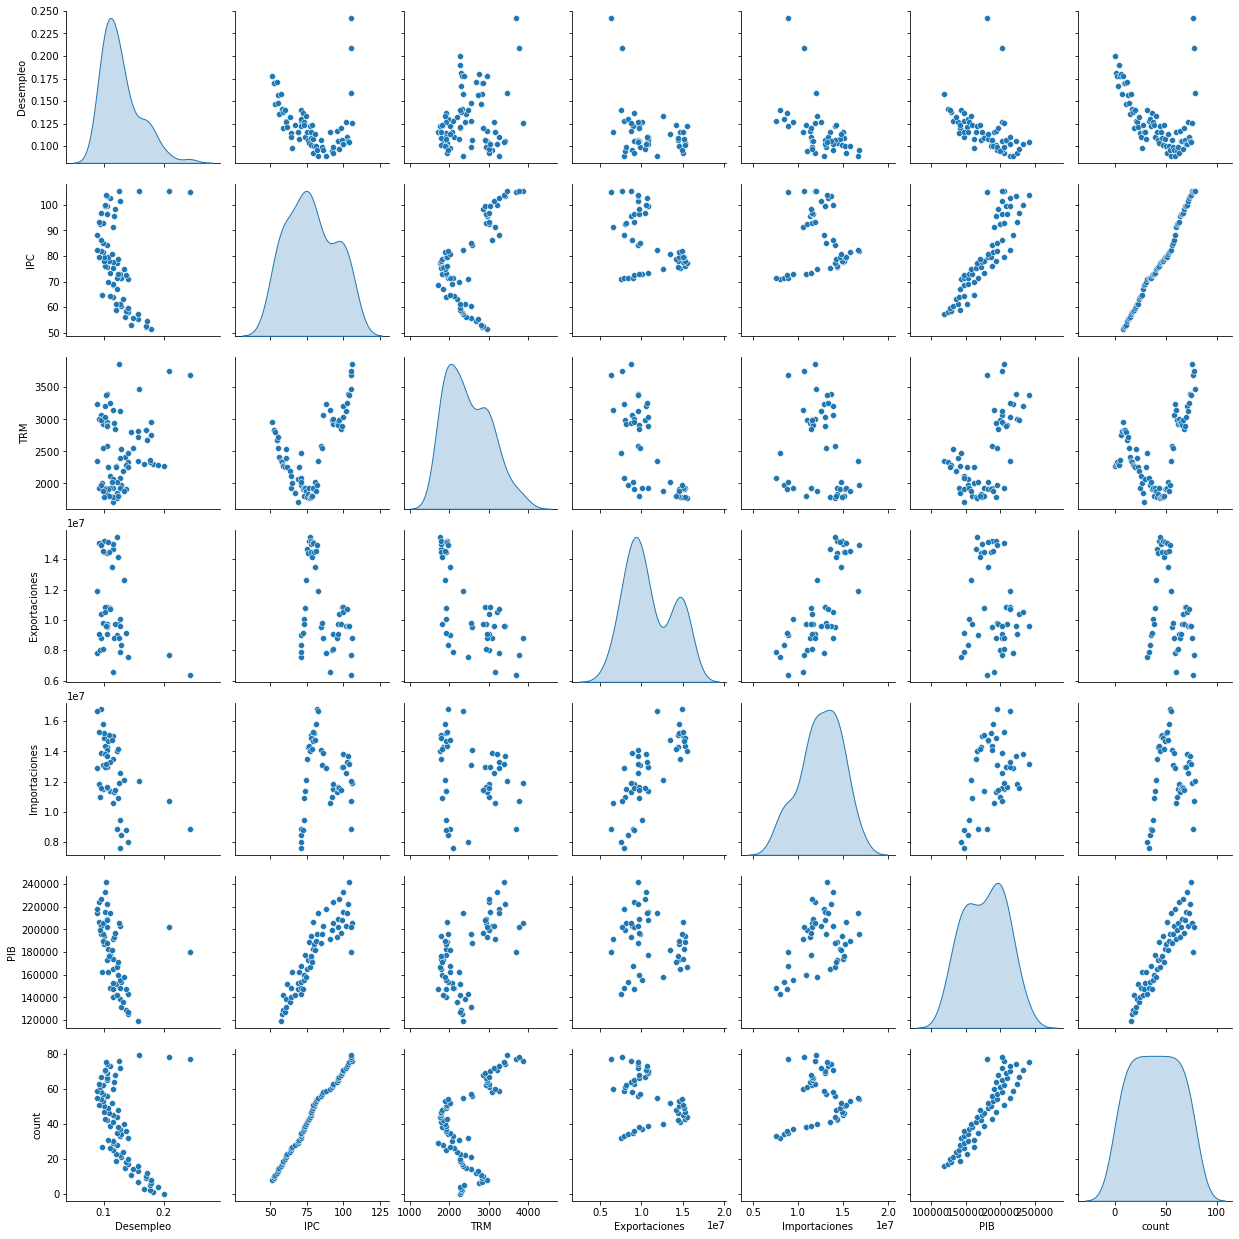

In [41]:
#Plot for correlations between variables
sns.pairplot(variables_df, diag_kind = 'kde')

In [26]:
def regression_imputer(dataframe, column_name):
    #dataframe must has a column called 'count' which is only a consecutive number of rows.
    df = dataframe.copy()  

    #regression between count and 'column_name'
    #The following code generates a df with the neccesary data to train the regression model, 
    #excluding the null values.
    model_data = df[['count', f'{column_name}']][df[f'{column_name}'].notnull()]

    #create x and y arrays, we must reshape it because LinearRegression() object only accepts array 
    #like inputs
    x = model_data['count'].values.reshape(-1, 1)
    y = model_data[f'{column_name}'].values.reshape(-1, 1)

    #Create the Linear Regression model to estimate the missing data
    regression_model = linear_model.LinearRegression()
    #fit the model
    regression_model.fit(X = x, y = y)

    #generate the x values to be predicted (the 'count' values)
    x_to_predict = df['count'][df[f'{column_name}'].isnull()].values.reshape(-1,1)

    #Make the predictions
    predictions = regression_model.predict(x_to_predict)

    #We need to transform the predictions array into a numeric list.
    predictions = [float(i) for i in predictions] 

    #From the dataframe, select all the null positions in the column, and then replace them by the 
    #new predictions
    df[f'{column_name}'][df[f'{column_name}'].isnull()] = predictions
     
    return df


In [27]:
#The following list takes the column names which are going to be imputed with regression technique.
columns_to_regression_imputer = ['IPC', 'PIB']

#Create a copy of the dataframe with the null columns
imputed_df = variables_df.copy()

#apply the regression imputer to the columns that need it 
for column in columns_to_regression_imputer:

    imputed_df = regression_imputer(imputed_df, column)


c:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
